In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [16]:
# unfiltered PODER
mt_df = pd.read_csv('../data/05_mastertable/master_table.tsv', sep='\t')
mt_df['pop_spec_t'] = (mt_df.population_sharing==1)&\
                      (mt_df.sample_sharing>1)
print(len(mt_df.loc[mt_df.pop_spec_t==True, 'isoform'].unique()))

5447


In [17]:
tool_cols = ['espresso', 'flair', 'isoquant', 'lyric']
mt_df = mt_df[tool_cols+['structural_category']]
for t in tool_cols:
    mt_df[t] = mt_df[t].astype(bool)

m = {'espresso':'ESPRESSO',
     'flair':'FLAIR',
     'isoquant':'IsoQuant',
     'lyric':'LyRic'}
mt_df.rename(m, axis=1, inplace=True)
mt_df.head()
mt_df.set_index([item for key, item in m.items()], inplace=True)

In [15]:
c_dict, order = get_novelty_colors()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


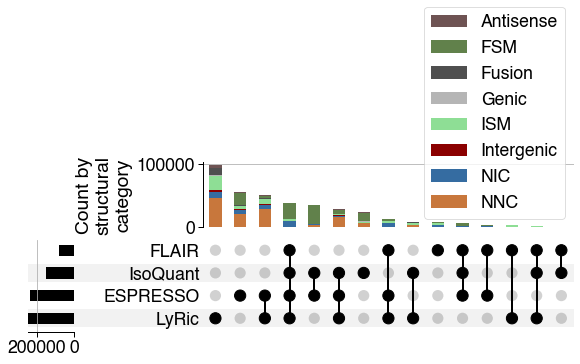

In [28]:
init_plot_settings(font_scale=1.2)
upset = upsetplot.UpSet(mt_df, intersection_plot_elements=0, sort_by='cardinality')  # disable the default bar chart
upset.add_stacked_bars(
    by='structural_category',
    colors=c_dict,
    title='Count by\nstructural\ncategory')
upset.plot()
# plt.show()
plt.savefig('transcript_detection_tool_structural_category_upset.pdf', 
            dpi=500)